In [27]:
import numpy as np
import pymc3 as pm
from scipy import stats
import matplotlib.pyplot as pl
import seaborn
%matplotlib inline

In [1]:
N_samples = [30] * 3 # total number of samples per group
G_samples = [18] * 3 # number of good quality samples per group

In [5]:
group_idx = np.repeat(np.arange(len(N_samples)),N_samples)

In [8]:
data = []
for i in range(0, len(N_samples)):
    data.extend(np.repeat([1, 0], [G_samples[i], 
                                   N_samples[i] - G_samples[i]]))

-> bad samples are marked with a 0 (Pb > WHO recommendations)

-> good samples are marked with a 1

In [11]:
data

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

This is similar to the typical coin problem, but with an additional hyper prior.

In [13]:
with pm.Model() as model_h:
    #hyper priors
    alpha = pm.HalfCauchy('alpha', beta=10)
    beta = pm.HalfCauchy('beta', beta=10)
    #prior
    theta = pm.Beta('theta', alpha, beta, shape=len(N_samples))
    # likelihood
    y = pm.Bernoulli('y', p=theta[group_idx], observed=data)
    trace_j = pm.sample(2000)
chain_h = trace_j[200:]   

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -65.315: 100%|██████████| 200000/200000 [00:26<00:00, 7555.01it/s]
Finished [100%]: Average ELBO = -65.288
100%|██████████| 2000/2000 [00:12<00:00, 158.37it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6188c05e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6193b62f60>]], dtype=object)

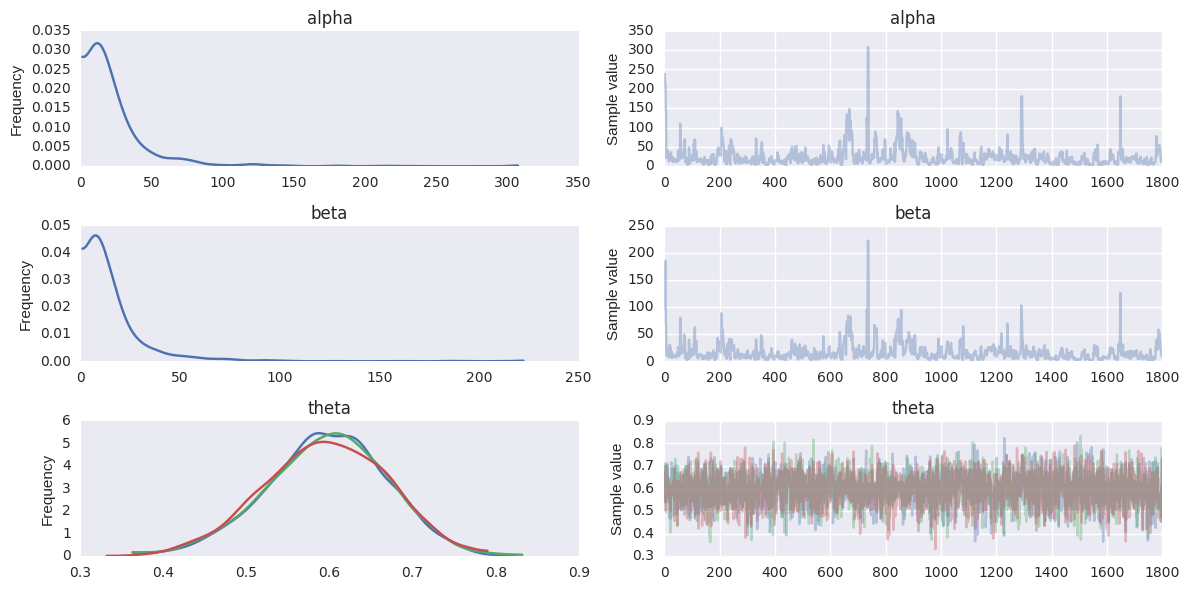

In [29]:
pm.traceplot(chain_h);

What does the estimated prior look like?

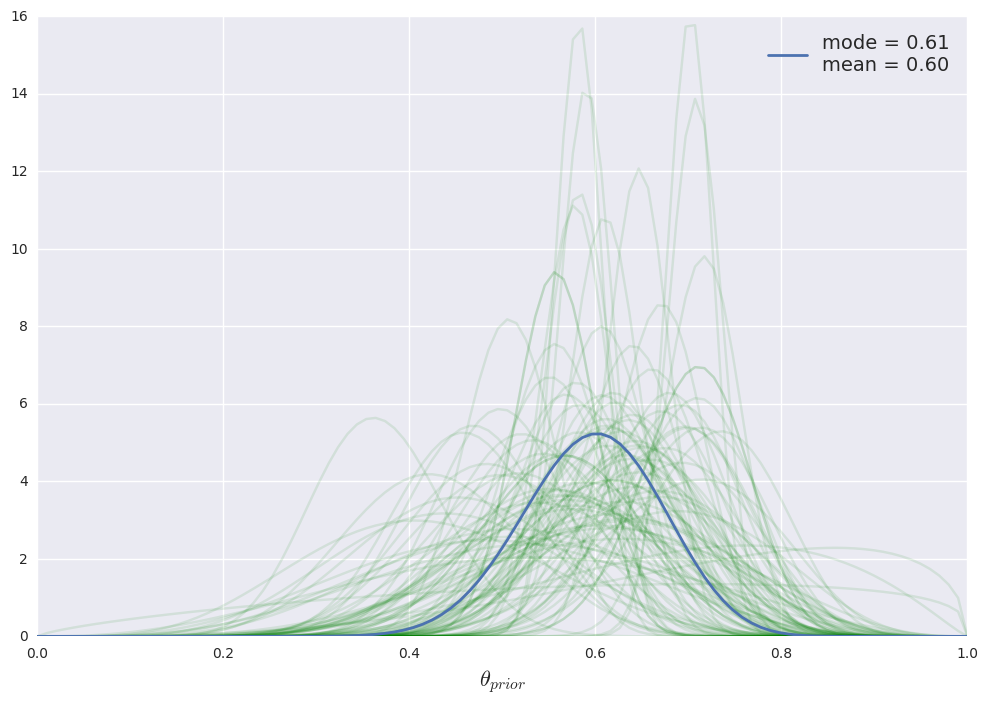

In [30]:
x = np.linspace(0, 1,  100)
f,ax=pl.subplots(figsize=(12,8))
for i in np.random.randint(0, len(chain_h), size=100):
    pdf = stats.beta(chain_h['alpha'][i], chain_h['beta'][i]).pdf(x)
    ax.plot(x, pdf, 'g', alpha=0.1)
dist = stats.beta(chain_h['alpha'].mean(), chain_h['beta'].mean())
pdf = dist.pdf(x)
mode=x[np.argmax(pdf)]
mean=dist.moment(1)
pl.plot(x, pdf, label='mode = %.2f\nmean = %.2f' %(mode, mean),lw=2)
pl.legend(fontsize=14)
pl.xlabel(r'$\theta_{prior}$', fontsize=16);